# Toturial 5. Regresion

## (Example) Predicting Prices of Used Cars

- **GOAL**: predicting prices of Toyota Corollas

## 0. Data

We have 1,436 car objects, each containing 38 attributes.

Input feature columns that we will use:

- Age: Age in years
- KM: Accumulated Kilometers on odometer
- FuelType: Fuel Type (Petrol, Diesel, CNG)
- HP: Horse Power
- MetColor: Metallic Color? (Yes=1, No=0)
- Automatic: Automatic ( (Yes=1, No=0)
- CC: Cylinder Volume in cubic centimeters
- Doors: Number of doors
- Weight: Weight in Kilograms

Output:

- Price: Offer Price in EUROs

Let's load the data located in the same folder, named `ToyotaCorolla.csv`.

In [1]:
import pandas as pd

df = pd.read_csv('ToyotaCorolla.csv')
df

,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,color,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,0,0,0,1,0,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,0,1,0,0,0,1,0,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,1,0,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,1,0,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,...,1,1,0,1,1,1,0,0,0,0
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,...,0,1,0,0,1,1,0,0,0,0
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,...,0,1,0,0,0,1,0,0,0,0
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,...,0,0,0,0,0,1,0,0,0,0


There are 38 columns in total. No missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   model              1436 non-null   object
 1   price              1436 non-null   int64 
 2   age_08_04          1436 non-null   int64 
 3   mfg_month          1436 non-null   int64 
 4   mfg_year           1436 non-null   int64 
 5   km                 1436 non-null   int64 
 6   fuel_type          1436 non-null   object
 7   hp                 1436 non-null   int64 
 8   met_color          1436 non-null   int64 
 9   color              1436 non-null   object
 10  automatic          1436 non-null   int64 
 11  cc                 1436 non-null   int64 
 12  doors              1436 non-null   int64 
 13  cylinders          1436 non-null   int64 
 14  gears              1436 non-null   int64 
 15  quarterly_tax      1436 non-null   int64 
 16  weight             1436 non-null   int64 


In [7]:
df.isna().sum()
# 결측치 없음.

model                0
price                0
age_08_04            0
mfg_month            0
mfg_year             0
km                   0
fuel_type            0
hp                   0
met_color            0
color                0
automatic            0
cc                   0
doors                0
cylinders            0
gears                0
quarterly_tax        0
weight               0
mfr_guarantee        0
bovag_guarantee      0
guarantee_period     0
abs                  0
airbag_1             0
airbag_2             0
airco                0
automatic_airco      0
boardcomputer        0
cd_player            0
central_lock         0
powered_windows      0
power_steering       0
radio                0
mistlamps            0
sport_model          0
backseat_divider     0
metallic_rim         0
radio_cassette       0
parking_assistant    0
tow_bar              0
dtype: int64

Since the `fuel_type` column is categorical, we will use `pd.get_dummies()` method to get dummie variables.

In [20]:
fuel_dummies = pd.get_dummies(
    df['fuel_type'], prefix='fuel', drop_first=True) # 3 categorical values, 2 dummie variables
fuel_dummies

,fuel_Diesel,fuel_Petrol
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1431,0,1
1432,0,1
1433,0,1
1434,0,1


Let's append the dummie variables to the original dataframe.

In [21]:
df = pd.concat([df, fuel_dummies], axis=1)
df.columns

Index(['model', 'price', 'age_08_04', 'mfg_month', 'mfg_year', 'km',
       'fuel_type', 'hp', 'met_color', 'color', 'automatic', 'cc', 'doors',
       'cylinders', 'gears', 'quarterly_tax', 'weight', 'mfr_guarantee',
       'bovag_guarantee', 'guarantee_period', 'abs', 'airbag_1', 'airbag_2',
       'airco', 'automatic_airco', 'boardcomputer', 'cd_player',
       'central_lock', 'powered_windows', 'power_steering', 'radio',
       'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim',
       'radio_cassette', 'parking_assistant', 'tow_bar', 'fuel_Diesel',
       'fuel_Petrol', 'fuel_Diesel', 'fuel_Petrol'],
      dtype='object')

Define X and y for price value regression.

In [22]:
input_variables = ['age_08_04', 'km', 'hp', 'met_color', 'automatic', 'cc', 'doors', 'weight', 'fuel_Diesel', 'fuel_Petrol',]
output_variable = 'price'

X = df[input_variables]
y = df[output_variable]
print(X.shape, y.shape)

(1436, 12) (1436,)


For model validation, we split the data into training and validation datasets at a ratio of 7:3.

In [23]:
from sklearn.model_selection import train_test_split

X_trn, X_val, y_trn, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_trn.shape, y_trn.shape, X_val.shape, y_val.shape

((1005, 12), (1005,), (431, 12), (431,))

We normalize the input feature scales using z-score.

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_trn)

X_trn = scaler.transform(X_trn)
X_val = scaler.transform(X_val)

## 1. Linear regression

Here, we will train 3 linear regression models:
- **Simple linear regression**: minimizing total residuals (errors)
- **Ridge regression (L2)**: mimimizing **sum of squared values of coefficients** as well as total residuals
- **Lasso regression (L1)**: minimizing **sum of absolute values of coefficients** as well as total residuals

Their performance will be evaluated using RMSE (root mean squred error).

In [25]:
from sklearn.linear_model import (LinearRegression, 
                                  Ridge, 
                                  Lasso)
from sklearn.metrics import (mean_absolute_error, 
                             mean_squared_error)

regr_lr = LinearRegression() #. 정규화가 없는 모델

regr_l2_01 = Ridge(alpha=0.1) #. 베타의 제곱을 최소화
regr_l2_1 = Ridge(alpha=1)
regr_l2_10 = Ridge(alpha=10)
regr_l2_100 = Ridge(alpha=100)  # regularizaiton이 강하게 된 것

regr_l1_01 = Lasso(alpha=0.1) #. 베타의 절대값을 최소화
regr_l1_1 = Lasso(alpha=1)
regr_l1_10 = Lasso(alpha=10)
regr_l1_100 = Lasso(alpha=100)

for regr in [regr_lr,
             regr_l2_01, regr_l2_1, regr_l2_10, regr_l2_100,
             regr_l1_01, regr_l1_1, regr_l1_10, regr_l1_100]:
    regr.fit(X_trn, y_trn)
    
    y_trn_pred = regr.predict(X_trn)
    y_val_pred = regr.predict(X_val)
    
    trn_error = mean_squared_error(y_trn, y_trn_pred, squared=False) #RMSE  만약 True로 하면 MSE
    val_error = mean_squared_error(y_val, y_val_pred, squared=False)
    
    print('Model: {} | Training RMSE: {:.3f} | Validation RMSE: {:.3f}'.format(str(regr), trn_error, val_error))    

Model: LinearRegression() | Training RMSE: 1308.234 | Validation RMSE: 1417.063
Model: Ridge(alpha=0.1) | Training RMSE: 1308.234 | Validation RMSE: 1417.051
Model: Ridge(alpha=1) | Training RMSE: 1308.237 | Validation RMSE: 1416.944
Model: Ridge(alpha=10) | Training RMSE: 1308.535 | Validation RMSE: 1416.231
Model: Ridge(alpha=100) | Training RMSE: 1328.975 | Validation RMSE: 1432.295
Model: Lasso(alpha=0.1) | Training RMSE: 1308.234 | Validation RMSE: 1417.084
Model: Lasso(alpha=1) | Training RMSE: 1308.257 | Validation RMSE: 1417.295
Model: Lasso(alpha=10) | Training RMSE: 1308.865 | Validation RMSE: 1416.036
Model: Lasso(alpha=100) | Training RMSE: 1331.256 | Validation RMSE: 1415.113


Check out the linear coefficient values of the input features!

In [26]:
X.columns

Index(['age_08_04', 'km', 'hp', 'met_color', 'automatic', 'cc', 'doors',
       'weight', 'fuel_Diesel', 'fuel_Diesel', 'fuel_Petrol', 'fuel_Petrol'],
      dtype='object')

In [27]:
regr_lr.coef_

array([-2277.09804812,  -595.32325619,   270.63408879,    38.35969598,
          41.26129262,    -9.15630037,   -68.32793323,  1203.39469786,
          46.67740912,    46.67740912,   247.73599777,   247.73599777])

In [28]:
regr_l1_100.coef_

array([-2.25349883e+03, -6.39200300e+02,  3.34711893e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.01534740e+02,
       -0.00000000e+00, -0.00000000e+00,  7.93940444e+01,  1.44795176e-14])

In [29]:
regr_l2_100.coef_

array([-2046.73063341,  -702.66514259,   325.32787185,    50.83597441,
          40.94685783,     8.73015153,   -10.58612182,  1072.96193264,
          16.80667888,    16.80667888,   128.73963428,   128.73963428])

With `for` loop and `zip` function, we can compare the values in a easier way!

In [30]:
for col, a, b, c in zip(X.columns, 
                        regr_lr.coef_, 
                        regr_l1_100.coef_, 
                        regr_l2_100.coef_):
    print('{:<15}: {:.2f}(lr),\t {:.2f}(l1),\t {:.2f}(l2)'.format(col, a, b, c))

age_08_04      : -2277.10(lr),	 -2253.50(l1),	 -2046.73(l2)
km             : -595.32(lr),	 -639.20(l1),	 -702.67(l2)
hp             : 270.63(lr),	 334.71(l1),	 325.33(l2)
met_color      : 38.36(lr),	 0.00(l1),	 50.84(l2)
automatic      : 41.26(lr),	 0.00(l1),	 40.95(l2)
cc             : -9.16(lr),	 0.00(l1),	 8.73(l2)
doors          : -68.33(lr),	 0.00(l1),	 -10.59(l2)
weight         : 1203.39(lr),	 901.53(l1),	 1072.96(l2)
fuel_Diesel    : 46.68(lr),	 -0.00(l1),	 16.81(l2)
fuel_Diesel    : 46.68(lr),	 -0.00(l1),	 16.81(l2)
fuel_Petrol    : 247.74(lr),	 79.39(l1),	 128.74(l2)
fuel_Petrol    : 247.74(lr),	 0.00(l1),	 128.74(l2)


Visualize the coefficient values with `matplotlib` package.

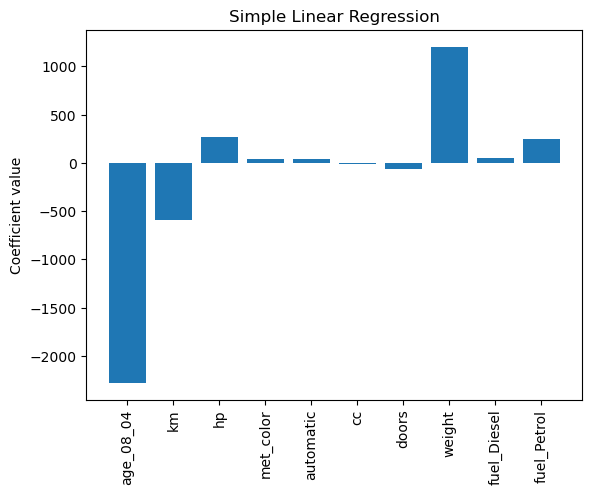

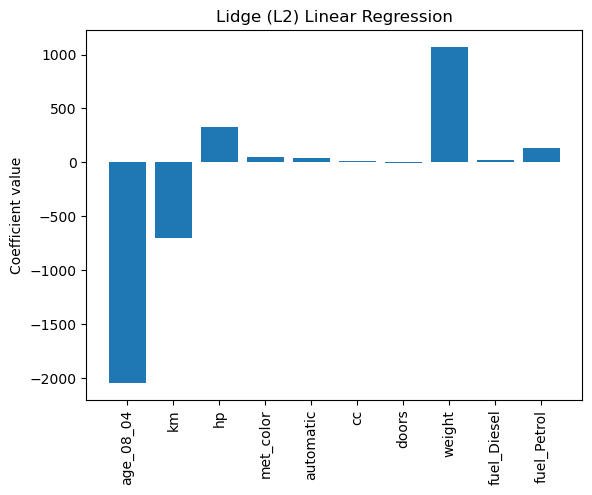

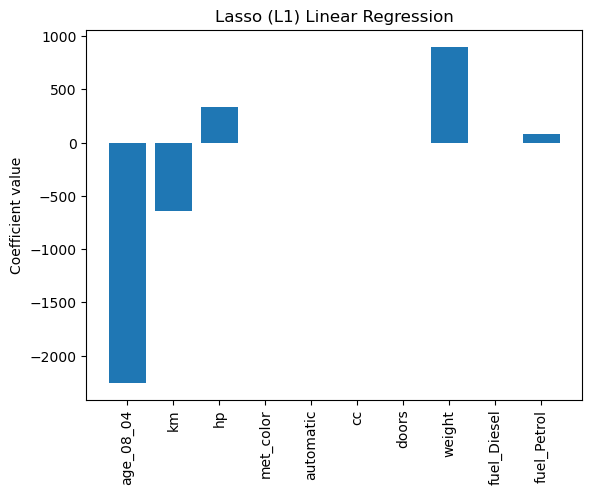

In [31]:
from matplotlib import pyplot as plt

plt.bar(X.columns, regr_lr.coef_)
plt.xticks(rotation=90)
plt.ylabel('Coefficient value')
plt.title('Simple Linear Regression')
plt.show()

plt.bar(X.columns, regr_l2_100.coef_)
plt.xticks(rotation=90)
plt.ylabel('Coefficient value')
plt.title('Lidge (L2) Linear Regression')
plt.show()

plt.bar(X.columns, regr_l1_100.coef_)
plt.xticks(rotation=90)
plt.ylabel('Coefficient value')
plt.title('Lasso (L1) Linear Regression')
plt.show()

## 2. Add more regression models

How about adding k-NN, decision tree, and random forest models as well as linear models?

In [44]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

regr_l1_c10 = Lasso(alpha=10)
regr_l1_c100 = Lasso(alpha=100)
regr_l1_c1000 = Lasso(alpha=1000)

regr_knn1 = KNeighborsRegressor(n_neighbors=1)
regr_knn3 = KNeighborsRegressor(n_neighbors=3)
regr_knn5 = KNeighborsRegressor(n_neighbors=5)

regr_dt3 = DecisionTreeRegressor(max_depth=3)
regr_dt5 = DecisionTreeRegressor(max_depth=5)

regr_rf10= RandomForestRegressor(n_estimators=10, random_state=42)
regr_rf100 = RandomForestRegressor(n_estimators=100, random_state=42)

for regr in [regr_l1_c10, regr_l1_c100, regr_l1_c1000,
             regr_knn1, regr_knn3, regr_knn5,
             regr_dt3, regr_dt5,
             regr_rf10, regr_rf100]:
    regr.fit(X_trn, y_trn)
    y_trn_pred = regr.predict(X_trn)
    y_val_pred = regr.predict(X_val)
    
    trn_error = mean_squared_error(y_trn, y_trn_pred, squared=False)
    val_error = mean_squared_error(y_val, y_val_pred, squared=False)
    print('Model: {:<40} | Training RMSE: {:.3f} | Validation RMSE: {:.3f}'.format(str(regr), trn_error, val_error))    

Model: Lasso(alpha=10)                          | Training RMSE: 1308.865 | Validation RMSE: 1416.036
Model: Lasso(alpha=100)                         | Training RMSE: 1331.256 | Validation RMSE: 1415.113
Model: Lasso(alpha=1000)                        | Training RMSE: 1960.971 | Validation RMSE: 2151.643
Model: KNeighborsRegressor(n_neighbors=1)       | Training RMSE: 0.000 | Validation RMSE: 1512.689
Model: KNeighborsRegressor(n_neighbors=3)       | Training RMSE: 984.904 | Validation RMSE: 1389.671
Model: KNeighborsRegressor()                    | Training RMSE: 1121.626 | Validation RMSE: 1387.184
Model: DecisionTreeRegressor(max_depth=3)       | Training RMSE: 1323.703 | Validation RMSE: 1385.418
Model: DecisionTreeRegressor(max_depth=5)       | Training RMSE: 1016.339 | Validation RMSE: 1228.713
Model: RandomForestRegressor(n_estimators=10, random_state=42) | Training RMSE: 493.291 | Validation RMSE: 1111.489
Model: RandomForestRegressor(random_state=42)   | Training RMSE: 427.520

Which model is predict the output well on the validation data?

From the above results, we can see that the random forest model with 100 trees performs the best with the lowest validation RMSE!

Let's check the feature importance scores of the random forest model.

In [53]:
for col, fi in zip(X.columns, regr_rf100.feature_importances_):
    print('{:<20}: {}'.format(col, fi))

age_08_04           : 0.8476925246341983
km                  : 0.06105528292259477
hp                  : 0.01750686085385139
met_color           : 0.004341063019774248
automatic           : 0.0009296936348306176
cc                  : 0.003048125473174488
doors               : 0.005457811673750257
weight              : 0.05625936643191087
fuel_Diesel         : 0.0006695564978706164
fuel_Diesel         : 0.0003933289107359017
fuel_Petrol         : 0.0013487754780288346
fuel_Petrol         : 0.0012976104692796796


We can see that `age_08_04` is the most important input feature!

How about the tree model with `max_depth=3`? Let's visualize it.

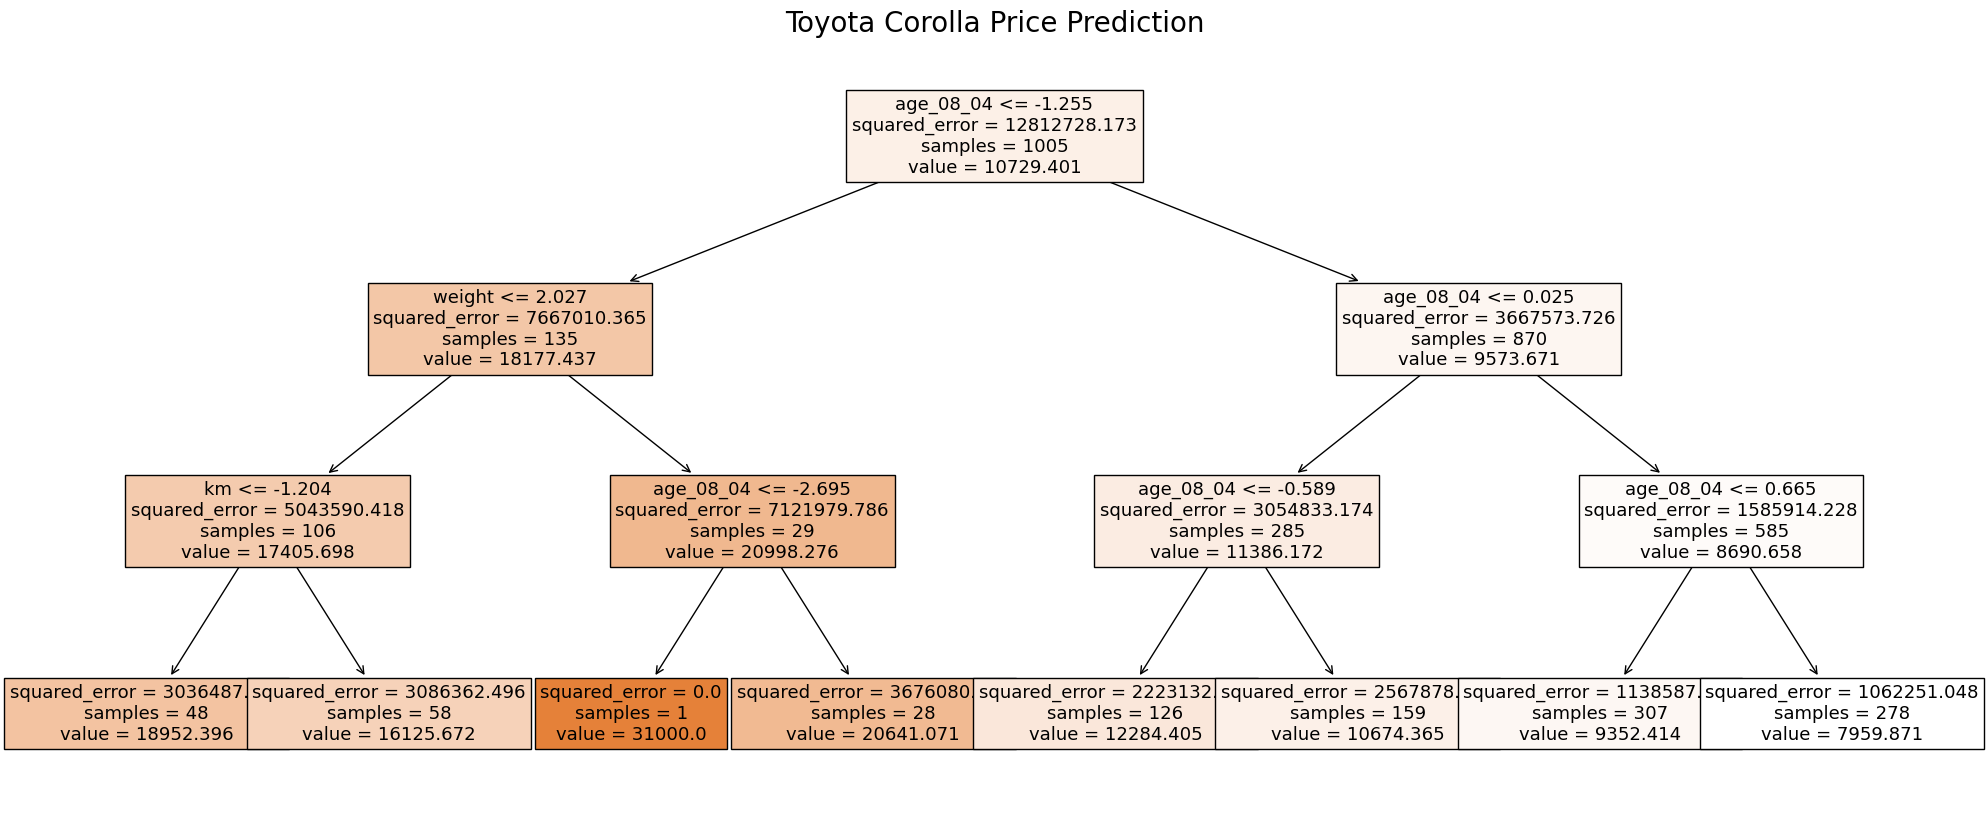

In [56]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(figsize=(25, 10))
plot_tree(regr_dt3, feature_names=X.columns.tolist(), filled=True, fontsize=13)
plt.title('Toyota Corolla Price Prediction', fontsize=20)
# plt.tight_layout()
plt.show()

We can see that the prices of cars with normalized `age_08_04 <= -1.255` and normalized `weight > 2.027` is relatively high (price value=`20998.276`)!